In [1]:
push!(LOAD_PATH, ".")
import Grib2

In [2]:
test_grib2_path = "test_grib2s/href.t00z.conus.mean.f07.grib2"
test_grib2_path = "test_grib2s/rap_130_20180319_1400_012.grb2"

"test_grib2s/rap_130_20180319_1400_012.grb2"

In [3]:
test_href_grid = Grib2.read_grid(test_grib2_path)

Grids.Grid(337, 451, 16.281, 58.365, -139.856, -57.38099999999997, Tuple{Float64,Float64}[(16.281, -126.138), (16.308, -126.016), (16.336, -125.894), (16.363, -125.771), (16.39, -125.649), (16.417, -125.527), (16.444, -125.404), (16.47, -125.282), (16.497, -125.159), (16.524, -125.036)  …  (55.73, -58.962), (55.703, -58.786), (55.676, -58.61), (55.648, -58.434), (55.621, -58.258), (55.593, -58.082), (55.565, -57.907), (55.538, -57.732), (55.51, -57.556), (55.481, -57.381)])

In [4]:
test_href_inventory = Grib2.read_inventory(test_grib2_path)

356×8 Array{String,2}:
 "1"     "0"         "d=2018031914"  …  "12 hour fcst"        ""  "n=1"  
 "2"     "66062"     "d=2018031914"     "12 hour fcst"        ""  "n=2"  
 "3"     "141047"    "d=2018031914"     "12 hour fcst"        ""  "n=3"  
 "4"     "185249"    "d=2018031914"     "12 hour fcst"        ""  "n=4"  
 "5"     "215279"    "d=2018031914"     "12 hour fcst"        ""  "n=5"  
 "6"     "430079"    "d=2018031914"  …  "12 hour fcst"        ""  "n=6"  
 "7"     "508105"    "d=2018031914"     "12 hour fcst"        ""  "n=7"  
 "8"     "564916"    "d=2018031914"     "12 hour fcst"        ""  "n=8"  
 "9"     "617924"    "d=2018031914"     "12 hour fcst"        ""  "n=9"  
 "10"    "648867"    "d=2018031914"     "12 hour fcst"        ""  "n=10" 
 "11"    "669886"    "d=2018031914"  …  "12 hour fcst"        ""  "n=11" 
 "12.1"  "687506"    "d=2018031914"     "12 hour fcst"        ""  "n=12" 
 "12.2"  "687506"    "d=2018031914"     "12 hour fcst"        ""  "n=13" 
 ⋮             

In [5]:
test_href_layers_data = Grib2.read_layers_data_raw(test_grib2_path, test_href_inventory[234:236,:])

151987×3 Array{Float32,2}:
 0.050209  297.731  0.0    
 0.050209  297.856  0.0    
 0.050209  297.981  0.0    
 0.050209  297.981  0.0    
 0.050209  297.856  0.0    
 0.050209  297.606  0.0    
 0.050209  297.794  0.0    
 0.050209  297.856  0.0    
 0.050209  297.731  0.0    
 0.050209  297.731  0.0    
 0.050209  298.294  0.0    
 0.050209  297.919  0.0    
 0.050209  298.044  0.0    
 ⋮                         
 0.050209  273.169  0.01902
 0.050209  273.169  0.01382
 0.050209  273.169  0.01098
 0.050209  273.169  0.00962
 0.050209  273.169  0.00954
 0.050209  273.169  0.01004
 0.050209  273.169  0.0106 
 0.050209  273.169  0.01116
 0.050209  273.044  0.01152
 0.050209  273.169  0.0113 
 0.050209  273.169  0.01082
 0.050209  273.044  0.01038

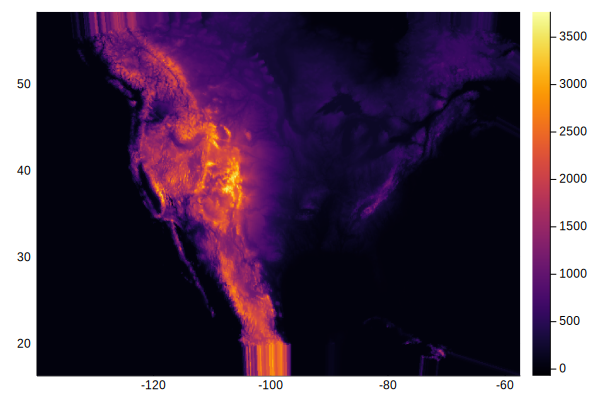

In [6]:
Grib2.plot(test_href_grid, test_href_layers_data[:,1])

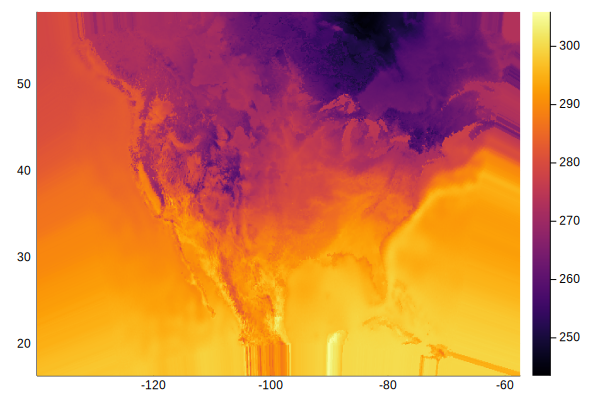

In [7]:
Grib2.plot(test_href_grid, test_href_layers_data[:,2])

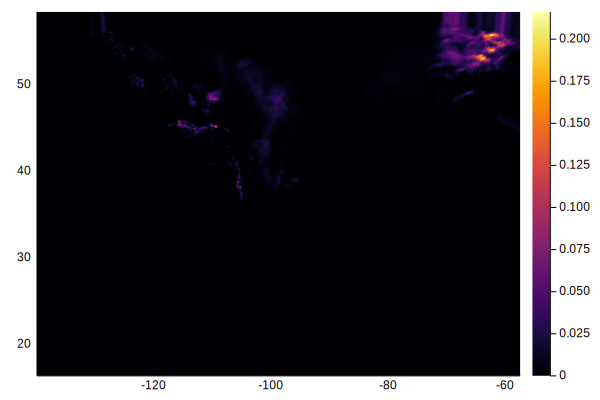

In [8]:
Grib2.plot(test_href_grid, test_href_layers_data[:,3])

In [9]:
test_href_inventory[235,:]

8-element Array{String,1}:
 "198"         
 "10170738"    
 "d=2018031914"
 "TMP"         
 "surface"     
 "12 hour fcst"
 ""            
 "n=235"       

In [10]:
test_href_inventory[236,:]

8-element Array{String,1}:
 "199"               
 "10269686"          
 "d=2018031914"      
 "ASNOW"             
 "surface"           
 "0-12 hour acc fcst"
 ""                  
 "n=236"             

In [11]:
# conus_data = Conus.grid_to_conus(test_href_grid)

In [12]:
# Grib2.plot(test_href_grid, conus_data)

In [13]:
# import DelimitedFiles # For readdlm
# DelimitedFiles.writedlm("conus_rap_grid.tsv", conus_data)

In [14]:
# import Grids
# Grids.to_file("rap_130_grid.jld", test_href_grid)
# Grids.to_file("rap_130_grid.bin", Grib2.read_grid("test_grib2s/rap_130_20180319_1400_012.grb2"))

In [15]:
# import DelimitedFiles # For readdlm
# DelimitedFiles.readdlm("conus_on_rap_130_grid.txt")[:,1]

In [16]:
import Conus

┌ Info: Recompiling stale cache file /Users/brian/.julia/compiled/v1.0/Conus.ji for Conus [top-level]
└ @ Base loading.jl:1190


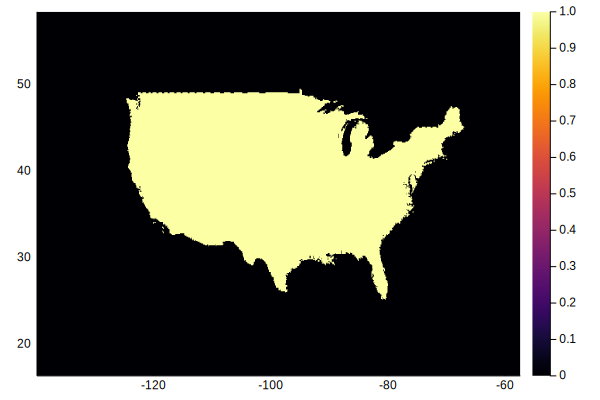

In [18]:
conus_data = map(latlon -> Conus.is_in_conus(latlon) ? 1.0f0 : 0.0f0, test_href_grid.lat_lons)
Grib2.plot(test_href_grid, conus_data)